<a href="https://colab.research.google.com/github/ThanhQuynh0202/VoNgocThanhQuynh_20104053_BTVN/blob/main/Nhan_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Nhận diện khuôn mặt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
%cd "/content/drive/My Drive/Colab Notebooks/BTVN/Nhan dien"

/content/drive/My Drive/Colab Notebooks/BTVN/Nhan dien


In [29]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [30]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Nhan dien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 169 images belonging to 3 classes.


In [31]:
validation=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Nhan dien/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 108 images belonging to 3 classes.


In [32]:
training_set.class_indices

{'Giau': 0, 'Quynh': 1, 'Sang': 2}

In [33]:
validation.class_indices

{'Giau': 0, 'Quynh': 1, 'Sang': 2}

In [36]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
6/6 [==============================] - 41s 7s/step - loss: 7.3056 - accuracy: 0.3669 - val_loss: 0.9932 - val_accuracy: 0.5185
Epoch 2/100
6/6 [==============================] - 36s 7s/step - loss: 0.5935 - accuracy: 0.7574 - val_loss: 0.1863 - val_accuracy: 0.9722
Epoch 3/100
6/6 [==============================] - 41s 6s/step - loss: 0.1802 - accuracy: 0.9408 - val_loss: 0.1946 - val_accuracy: 0.9444
Epoch 4/100
6/6 [==============================] - 36s 6s/step - loss: 0.4747 - accuracy: 0.8639 - val_loss: 0.3344 - val_accuracy: 0.8981
Epoch 5/100
6/6 [==============================] - 39s 7s/step - loss: 0.2544 - accuracy: 0.9053 - val_loss: 0.1585 - val_accuracy: 0.9444
Epoch 6/100
6/6 [==============================] - 37s 6s/step - loss: 0.2299 - accuracy: 0.9349 - val_loss: 0.1162 - val_accuracy: 0.9630
Epoch 7/100
6/6 [==============================] - 39s 6s/step - loss: 0.2291 - accuracy: 0.9172 - val_loss: 0.2704 - val_accuracy: 0.8704
Epoch 8/100
6/6 [==========

In [38]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0015084733022376895
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

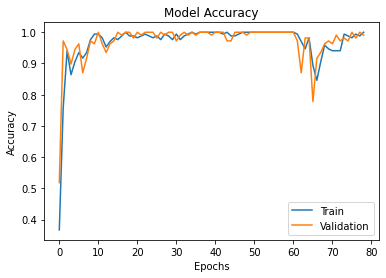

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [40]:
model.save("Nhan_dien_nguoi.h5")

In [41]:
model_CNN=load_model('Nhan_dien_nguoi.h5')

1/1 [==============================] - 0s 269ms/step
Sang


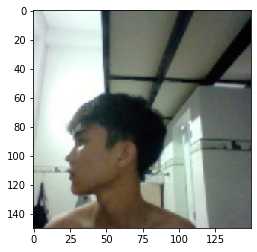

1/1 [==============================] - 0s 56ms/step
Sang


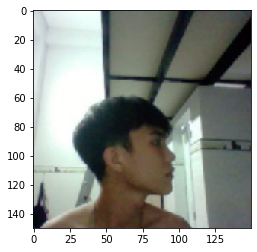

1/1 [==============================] - 0s 60ms/step
Sang


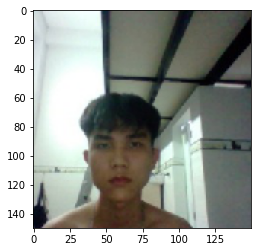

1/1 [==============================] - 0s 57ms/step
Quynh


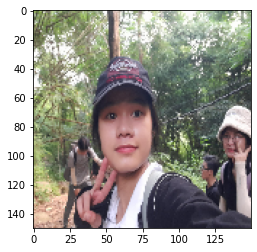

1/1 [==============================] - 0s 94ms/step
Quynh


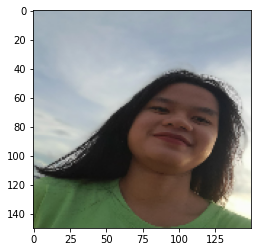

1/1 [==============================] - 0s 58ms/step
Quynh


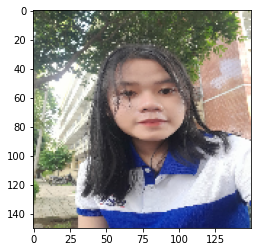

In [43]:
test="/content/drive/My Drive/Colab Notebooks/BTVN/Nhan dien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Giau'
  if round(result[0][1])==1:
    prediction='Quynh'
  if round(result[0][2])==1:
    prediction='Sang'
  print(prediction)
  plt.show()